In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [35]:
data = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [36]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [37]:
data.shape #Gives the Number of Rows and Columns in dataset

(5110, 12)

In [38]:
data.info() #Describes the Datatype of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [39]:
data.head() #Gives Top 5 Records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
data.tail() #Gives last 5 records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [41]:
data.describe() #Displays the Attributes

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [42]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [43]:
data["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [44]:
data["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [45]:
# See the min, max, mean values
print('The highest glucose level was of:',data['avg_glucose_level'].max())
print('The lowest glucose level was of:',data['avg_glucose_level'].min())
print('The average glucose level in the data:',data['avg_glucose_level'].mean())

The highest glucose level was of: 271.74
The lowest glucose level was of: 55.12
The average glucose level in the data: 106.1476771037182


**DATA VISUALIZATIONS FROM GRAPHS**

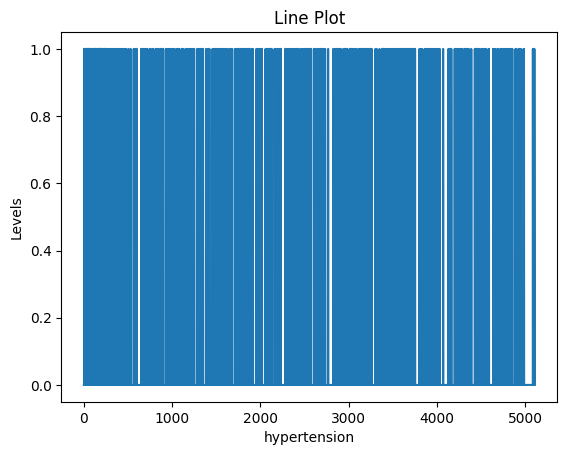

In [46]:
#import matplotlib.pyplot as plt

# Line plot
plt.plot(data['hypertension'])
plt.xlabel("hypertension")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

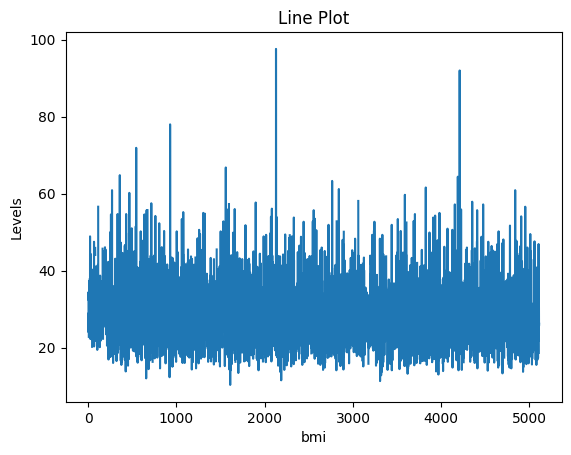

In [47]:
# Line plot
plt.plot(data['bmi'])
plt.xlabel("bmi")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

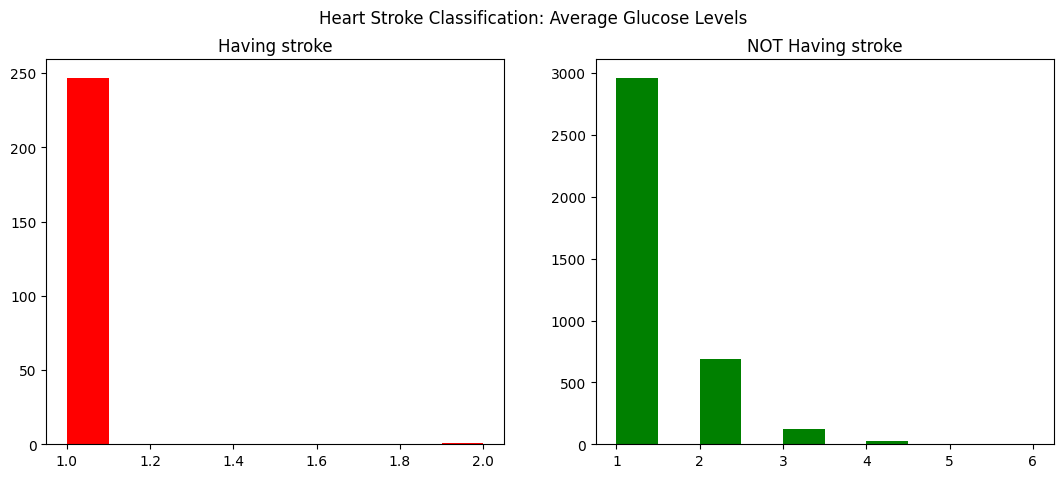

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['stroke']==1]['avg_glucose_level'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having stroke')

data_len=data[data['stroke']==0]['avg_glucose_level'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having stroke')

fig.suptitle('Heart Stroke Classification: Average Glucose Levels')
plt.show()

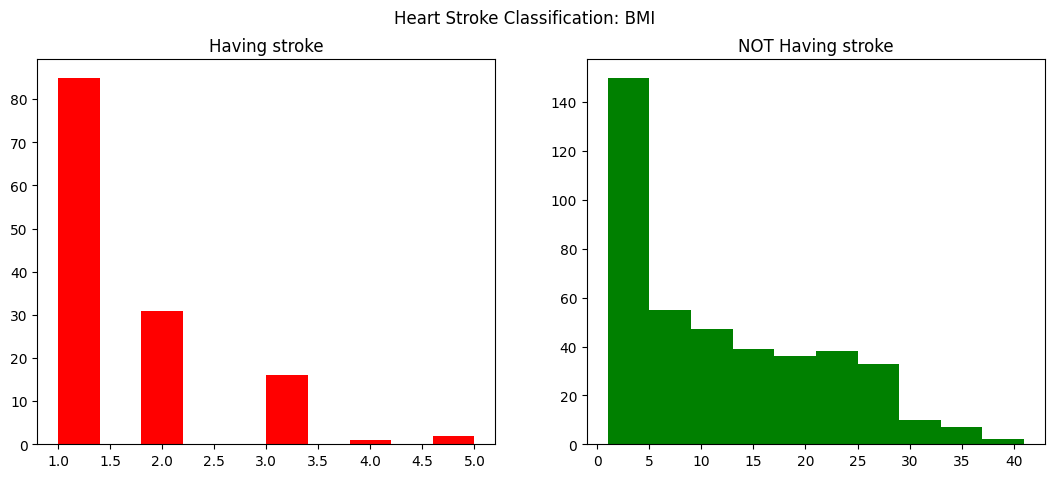

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['stroke']==1]['bmi'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having stroke')

data_len=data[data['stroke']==0]['bmi'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having stroke')

fig.suptitle('Heart Stroke Classification: BMI')
plt.show()

In [50]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

**PRE-PROCESSING**

In [51]:
data.isnull().sum() #checking for Total null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [52]:
data = data.fillna(method="bfill") #filling the null values with backward values in a new dataset
data #displaying the new dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,40.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**DATA NORMALIZATION**

In [53]:
import pandas as pd

# Assuming 'df' is your DataFrame
feature_names = data.columns.tolist()
feature_names

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [54]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data, encoded_cols], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [56]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,0.0,1.0,228.69,36.6,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,202.21,32.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,32.5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,40.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,44873.0,81.0,0.0,0.0,125.20,40.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


**TRAINING THE MODEL**

<Axes: >

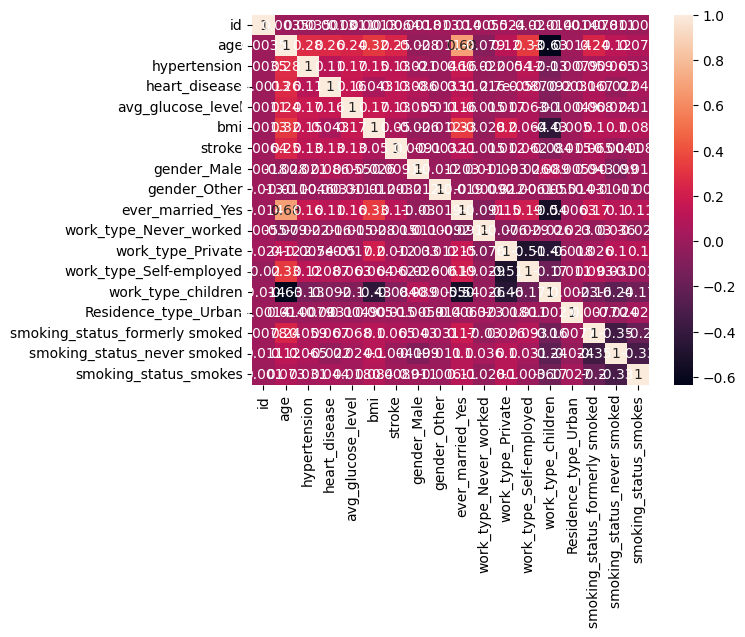

In [57]:
corr=data.corr()
sns.heatmap(corr, annot=True)

In [58]:
count_class_0, count_class_1 = data['stroke'].value_counts()
print(count_class_0)
print(count_class_1)
data_class_0 = data[data['stroke'] == 0]
data_class_1 = data[data['stroke'] == 1]

4861
249


Random under-sampling:
0.0    249
1.0    249
Name: stroke, dtype: int64
Shape of the new dataset is (498, 18)



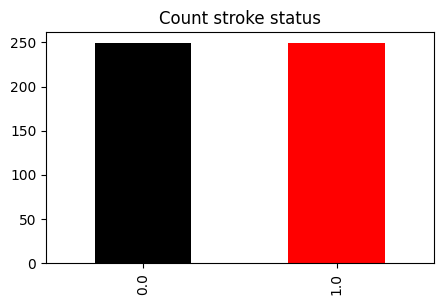

In [59]:
data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = data_test_under['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {data_test_under.shape}\n")

Random under-sampling:
0.0    4861
1.0    4861
Name: stroke, dtype: int64
Shape of the new dataset is (9722, 18)



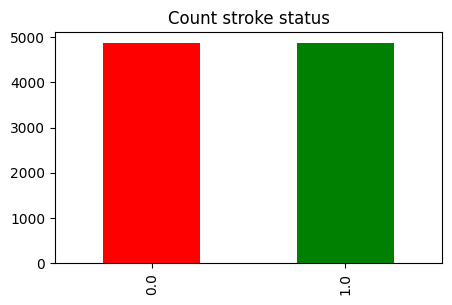

In [60]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random under-sampling:')
print(data_test_over['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = data_test_over['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['red', 'green'])
print(f"Shape of the new dataset is {data_test_over.shape}\n")

In [61]:
from sklearn.model_selection import train_test_split
X = data_test_over.drop(columns='stroke')
y = data_test_over['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 30, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6805, 17), (2917, 17), (6805,), (2917,))

In [62]:
newdata = data.ffill()

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming 'classification' is a variable containing the target column name
classification = 'stroke'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes'
 ]
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model
accuracy = metrics.accuracy_score(predictions, test_Y)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(test_Y, predictions)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression model is: 0.9419439008480104
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
         1.0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [64]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'classification' is a variable containing the target column name
classification = 'stroke'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes'
 ]
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model using R-squared
r_squared = r2_score(test_Y, predictions)
print('The R-squared of the Linear Regression model is:', r_squared)


The R-squared of the Linear Regression model is: 0.08577728550385866


In [65]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'classification' is a variable containing the target column name
classification = 'stroke'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes'
 ]
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Convert predictions to binary (e.g., 1 if prediction > threshold else 0)
threshold = 0.5
binary_predictions = [1 if pred > threshold else 0 for pred in predictions]

# Convert true labels to binary
binary_true_labels = [1 if label > threshold else 0 for label in test_Y]

# Calculate accuracy
accuracy = accuracy_score(binary_true_labels, binary_predictions)
print('Linear Regression Accuracy:', accuracy)


Linear Regression Accuracy: 0.9419439008480104


In [66]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'classification' is a variable containing the target column name
classification = 'stroke'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes'
 ]
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model using various metrics
mse = mean_squared_error(test_Y, predictions)
rmse = mean_squared_error(test_Y, predictions, squared=False)  # calculate the square root of MSE
mae = mean_absolute_error(test_Y, predictions)
r_squared = r2_score(test_Y, predictions)

print('Linear Regression Accuracy:', accuracy)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r_squared)


Linear Regression Accuracy: 0.9419439008480104
Mean Squared Error: 0.04999480716525462
Root Mean Squared Error: 0.2235951859169929
Mean Absolute Error: 0.09841643375781503
R-squared: 0.08577728550385866
